# This notebook performs Exploratory Data Analysis on Salesforce Case data for the top 5 reason codes, for the last one year

In [71]:
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# We read from the salesforce export data (50k rows) for 5 top Reason codes, and concatenate into a single set

In [72]:
sfdc_data_returns = pd.read_csv('C:/Users/GCNDP/Downloads/SFDC_Case_Returns_12Sep.csv')
sfdc_data_refusals = pd.read_csv('C:/Users/GCNDP/Downloads/SFDC_Case_Refusals_12Sep.csv')
sfdc_data_delivery = pd.read_csv('C:/Users/GCNDP/Downloads/SFDC_Case_Delivery_12Sep.csv')
sfdc_data_credit = pd.read_csv('C:/Users/GCNDP/Downloads/SFDC_Case_Credit_12Sep_1.csv')
sfdc_data_support = pd.read_csv('C:/Users/GCNDP/Downloads/SFDC_Case_Support_12Sep.csv')

In [73]:
frames = [sfdc_data_returns, sfdc_data_refusals, sfdc_data_delivery,sfdc_data_credit,sfdc_data_support]

In [74]:
sfdc_data = pd.concat(frames)

In [75]:
print(len(sfdc_data))

50000


In [76]:
sfdc_data.loc[(sfdc_data['Reason']=='Delivery/Shipments'),'label']='0'
sfdc_data.loc[(sfdc_data['Reason']=='Systems Support'),'label']='1'
sfdc_data.loc[(sfdc_data['Reason']=='Returns'),'label']='2'
sfdc_data.loc[(sfdc_data['Reason']=='Credit'),'label']='3'
sfdc_data.loc[(sfdc_data['Reason']=='Refusals'),'label']='4'

In [55]:
sfdc_data['label'].value_counts()

2    10000
3    10000
1    10000
0    10000
4    10000
Name: label, dtype: int64

In [77]:
sfdc_data['month']=pd.to_datetime(sfdc_data['CreatedDate']).dt.to_period('M')

In [78]:
sfdc_data['month'].sort_values(ascending=False).head()

0     2018-09
757   2018-09
755   2018-09
754   2018-09
753   2018-09
Name: month, dtype: object

In [79]:
sfdc_data['month'].min()

Period('2017-07', 'M')

In [80]:
sfdc_data['month'].max()

Period('2018-09', 'M')

# We select Case data with Status = Closed (49265 rows out of 50 k rows)

In [81]:
sfdc_data_closed = sfdc_data.loc[(sfdc_data['Status']=='Closed')]
print(len(sfdc_data_closed))

49265


In [82]:
sfdc_data_closed = sfdc_data_closed.set_index('month')

In [83]:
sfdc_data_closed['year-month']=sfdc_data_closed.index
#print(sfdc_data_closed.index)

# We take subset of the data for a year from 2017-09 to 2018-08

In [84]:
sfdc_data_closed_oneyear = sfdc_data_closed[(sfdc_data_closed.index >= '2017-09') & (sfdc_data_closed.index <= '2018-08')]

In [62]:
sfdc_data_closed_oneyear ['week']=pd.to_datetime(sfdc_data_closed_oneyear['CreatedDate']).dt.to_period('W')

In [44]:
sfdc_case_by_month=sfdc_data_closed_oneyear.groupby(['year-month']).size()
print(sfdc_case_by_month.sort_values(ascending=False))

year-month
2018-06    9158
2018-07    8772
2018-03    5976
2018-08    5456
2018-04    4301
2018-02    3879
2018-05    3674
2017-11    1114
2017-10     924
2018-01     835
2017-09     775
2017-12     730
Freq: M, dtype: int64


In [18]:
sfdc_case_by_wk=sfdc_data_closed_oneyear.groupby(['week']).size()
print(sfdc_case_by_wk.sort_values(ascending=False).head())

week
2018-07-09/2018-07-15    2647
2018-06-25/2018-07-01    2473
2018-06-18/2018-06-24    2373
2018-05-28/2018-06-03    2243
2018-07-16/2018-07-22    2158
Freq: W-SUN, dtype: int64


# We find a sudden spurt in the number of cases from Feb, 2018, and the maximum volume of cases in the month of Jun 08 (9158)

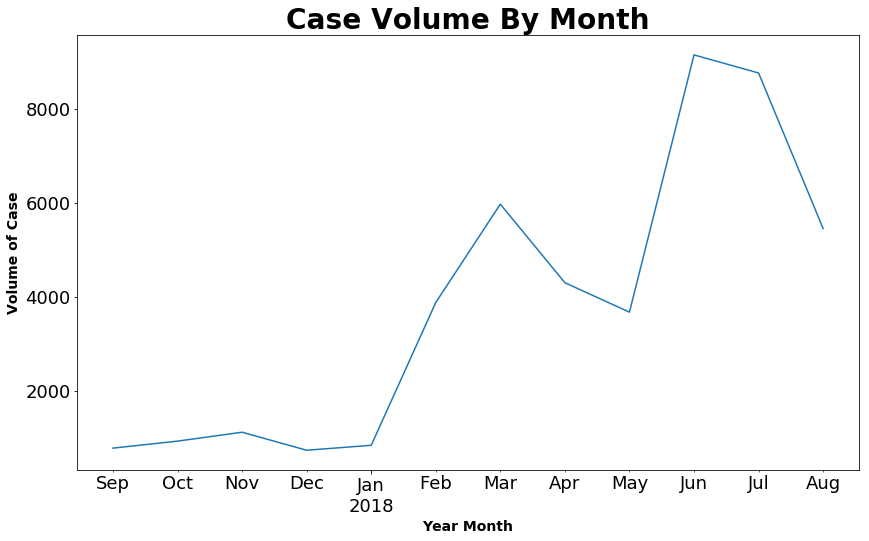

In [140]:
#sfdc_case_by_month.plot(kind='bar')
ax = sfdc_case_by_month.plot(figsize=(14,8),fontsize=14)
ax.set_title("Case Volume By Month",fontsize=28,fontweight='bold')
ax.set_xlabel("Year Month",fontsize=14,fontweight='bold')
ax.set_ylabel("Volume of Case", fontsize="14",fontweight="bold")
ax.tick_params(axis='both',which='major',labelsize=18)
ax.tick_params(axis='both',which='minor',labelsize=18)

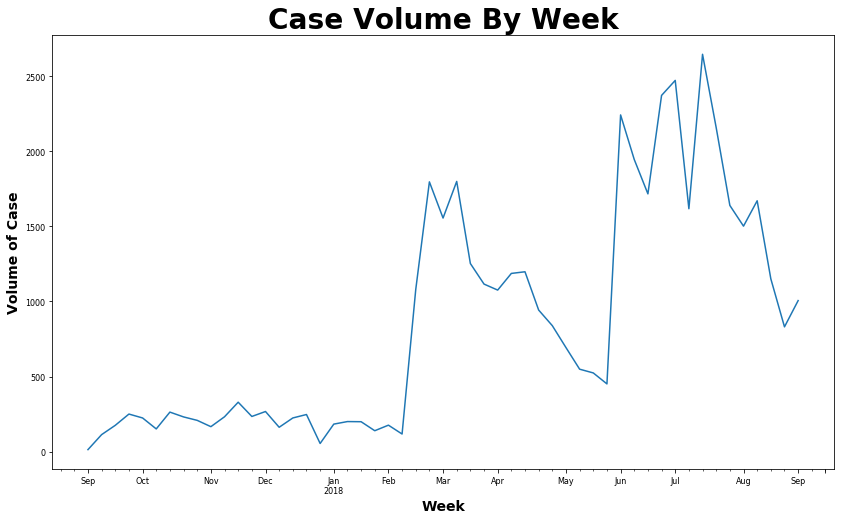

In [141]:
#sfdc_case_by_month.plot(kind='bar')
ax = sfdc_case_by_wk.plot(figsize=(14,8),fontsize=14)
ax.set_title("Case Volume By Week",fontsize=28,fontweight='bold')
ax.set_xlabel("Week",fontsize=14,fontweight='bold')
ax.set_ylabel("Volume of Case", fontsize="14",fontweight="bold")
ax.tick_params(axis='both',which='major',labelsize=8)
ax.tick_params(axis='both',which='minor',labelsize=18)

In [19]:
sfdc_data_closed_JunAug = sfdc_data_closed_oneyear.loc[(sfdc_data_closed_oneyear.index>='2018-06') & (sfdc_data_closed_oneyear.index<='2018-08')]
print(len(sfdc_data_closed_JunAug))

23386


In [20]:
sfdc_data_closed_JunAug['Reason'].value_counts()

Returns               9669
Delivery/Shipments    6096
Credit                5632
Systems Support       1936
Refusals                53
Name: Reason, dtype: int64

# We plot Reason codes for Jun to Aug 08 and find Returns is the highest category, followed by Delivery/Shipment

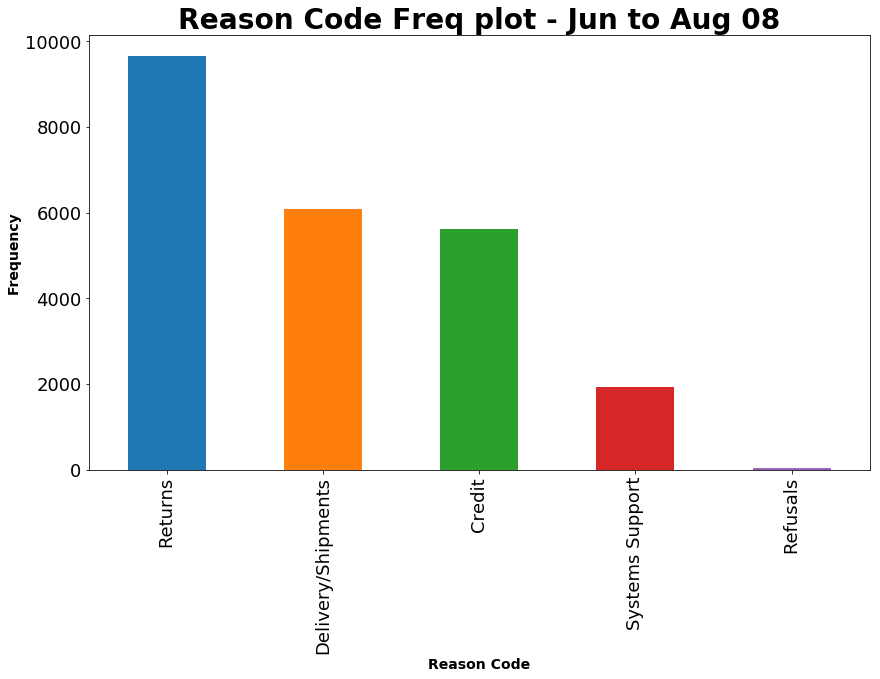

In [23]:
ax = sfdc_data_closed_JunAug['Reason'].value_counts().plot(kind='bar',figsize=(14,8),fontsize=14)
ax.set_title("Reason Code Freq plot - Jun to Aug 08",fontsize=28,fontweight='bold')
ax.set_xlabel("Reason Code",fontsize=14,fontweight='bold')
ax.set_ylabel("Frequency", fontsize="14",fontweight="bold")
ax.tick_params(axis='both',which='major',labelsize=18)
ax.tick_params(axis='both',which='minor',labelsize=18)

In [21]:
df_gby = sfdc_data_closed_JunAug[['Owner_Name__c']].groupby(['Owner_Name__c']).size()

In [25]:
df_gby_top10 = df_gby.sort_values(ascending=False)[:10]

# We plot the top 10 Agents / Owners who handled the maximum cases in Jun 08. We find Jil White the highest, followed by Sandra Norman

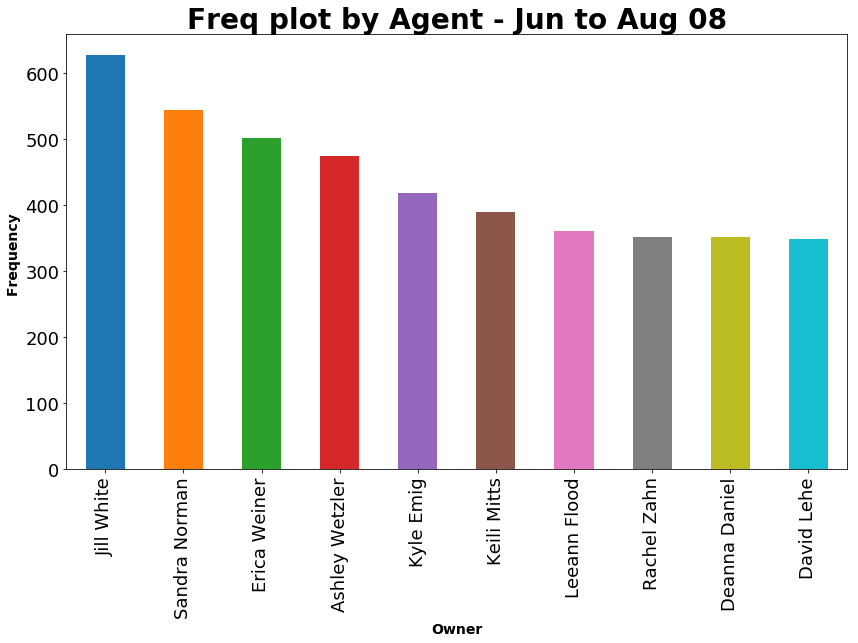

In [77]:
ax = df_gby_top10.plot(kind='bar',figsize=(14,8),fontsize=14)
ax.set_title("Freq plot by Agent - Jun to Aug 08",fontsize=28,fontweight='bold')
ax.set_xlabel("Owner",fontsize=14,fontweight='bold')
ax.set_ylabel("Frequency ", fontsize="14",fontweight="bold")
ax.tick_params(axis='both',which='major',labelsize=18)
ax.tick_params(axis='both',which='minor',labelsize=18)

In [87]:
sfdc_data_closed_JunAug_Jill = sfdc_data_closed_JunAug.loc[(sfdc_data_closed_JunAug['Owner_Name__c']=='Sandra Norman')]

In [88]:
sfdc_data_closed_JunAug_month=sfdc_data_closed_JunAug_Jill.groupby(['year-month']).size()

In [89]:
sfdc_data_closed_JunAug_month.head()

year-month
2018-06    446
2018-07     89
2018-08      8
Freq: M, dtype: int64

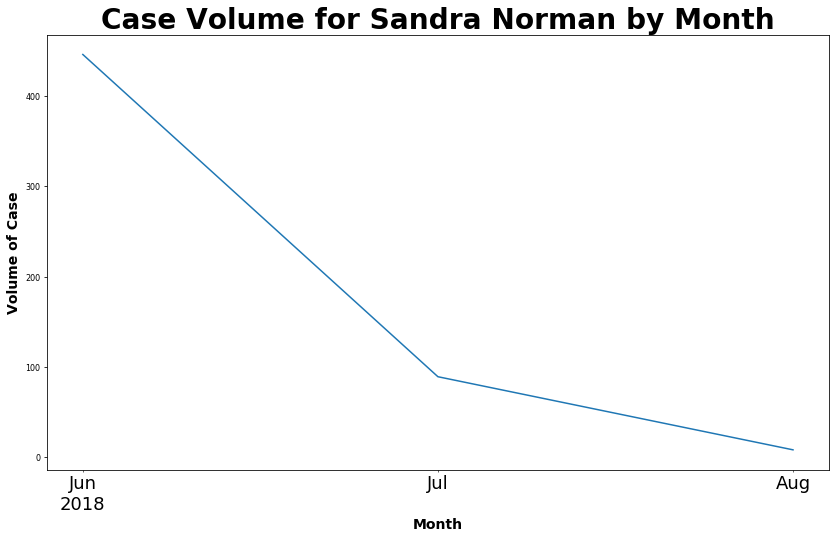

In [90]:
ax = sfdc_data_closed_JunAug_month.plot(figsize=(14,8),fontsize=14)
ax.set_title("Case Volume for Sandra Norman by Month",fontsize=28,fontweight='bold')
ax.set_xlabel("Month",fontsize=14,fontweight='bold')
ax.set_ylabel("Volume of Case", fontsize="14",fontweight="bold")
ax.tick_params(axis='both',which='major',labelsize=8)
ax.tick_params(axis='both',which='minor',labelsize=18)

In [145]:
sfdc_data_closed_Returns_JunAug = sfdc_data_closed_JunAug.loc[(sfdc_data_closed_JunAug['Reason']=='Returns')]

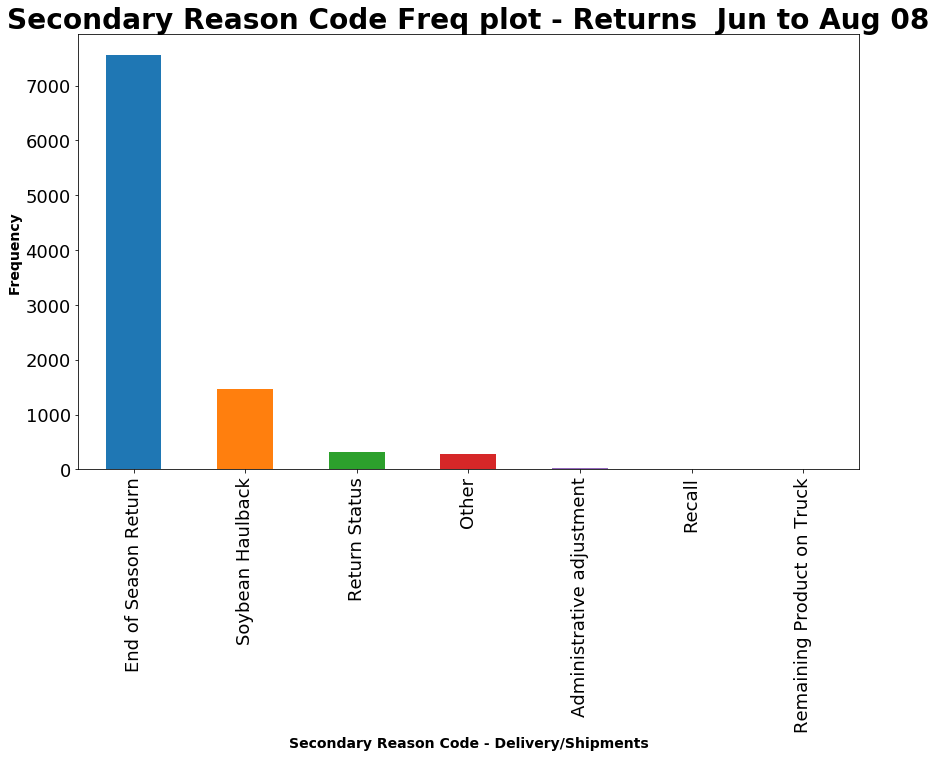

In [146]:
ax = sfdc_data_closed_Returns_JunAug['GC_Secondary_Reason_Descr__c'].value_counts().plot(kind='bar',figsize=(14,8),fontsize=14)
ax.set_title("Secondary Reason Code Freq plot - Returns  Jun to Aug 08",fontsize=28,fontweight='bold')
ax.set_xlabel("Secondary Reason Code - Delivery/Shipments",fontsize=14,fontweight='bold')
ax.set_ylabel("Frequency", fontsize="14",fontweight="bold")
ax.tick_params(axis='both',which='major',labelsize=18)
ax.tick_params(axis='both',which='minor',labelsize=18)

# We plot the Secondary Reason Codes for Returns for Jun to Aug 08 and find 'End of Season Return' is by far the dominant Secondary Reason code under Returns

# We explore Case Age in Days for all cases in Jun - Aug 08

In [22]:
sfdc_data_closed_JunAug['ClosedDate'] = pd.to_datetime(sfdc_data_closed_JunAug['ClosedDate'])
sfdc_data_closed_JunAug['CreatedDate'] = pd.to_datetime(sfdc_data_closed_JunAug['CreatedDate'])

In [85]:
sfdc_data_closed_oneyear['ClosedDate'] = pd.to_datetime(sfdc_data_closed_oneyear['ClosedDate'])
sfdc_data_closed_oneyear['CreatedDate'] = pd.to_datetime(sfdc_data_closed_oneyear['CreatedDate'])

In [24]:
sfdc_data_closed_JunAug['CaseAge'] = sfdc_data_closed_JunAug['ClosedDate'] - sfdc_data_closed_JunAug['CreatedDate']
sfdc_data_closed_oneyear['CaseAge'] = sfdc_data_closed_oneyear['ClosedDate'] - sfdc_data_closed_oneyear['CreatedDate']

In [25]:
sfdc_data_closed_JunAug['CaseAge'] =sfdc_data_closed_JunAug['CaseAge'] /np.timedelta64(1, 'D')
sfdc_data_closed_oneyear['CaseAge'] =sfdc_data_closed_oneyear['CaseAge'] /np.timedelta64(1, 'D')

In [26]:
data = sfdc_data_closed_oneyear[['year-month','CaseAge']]

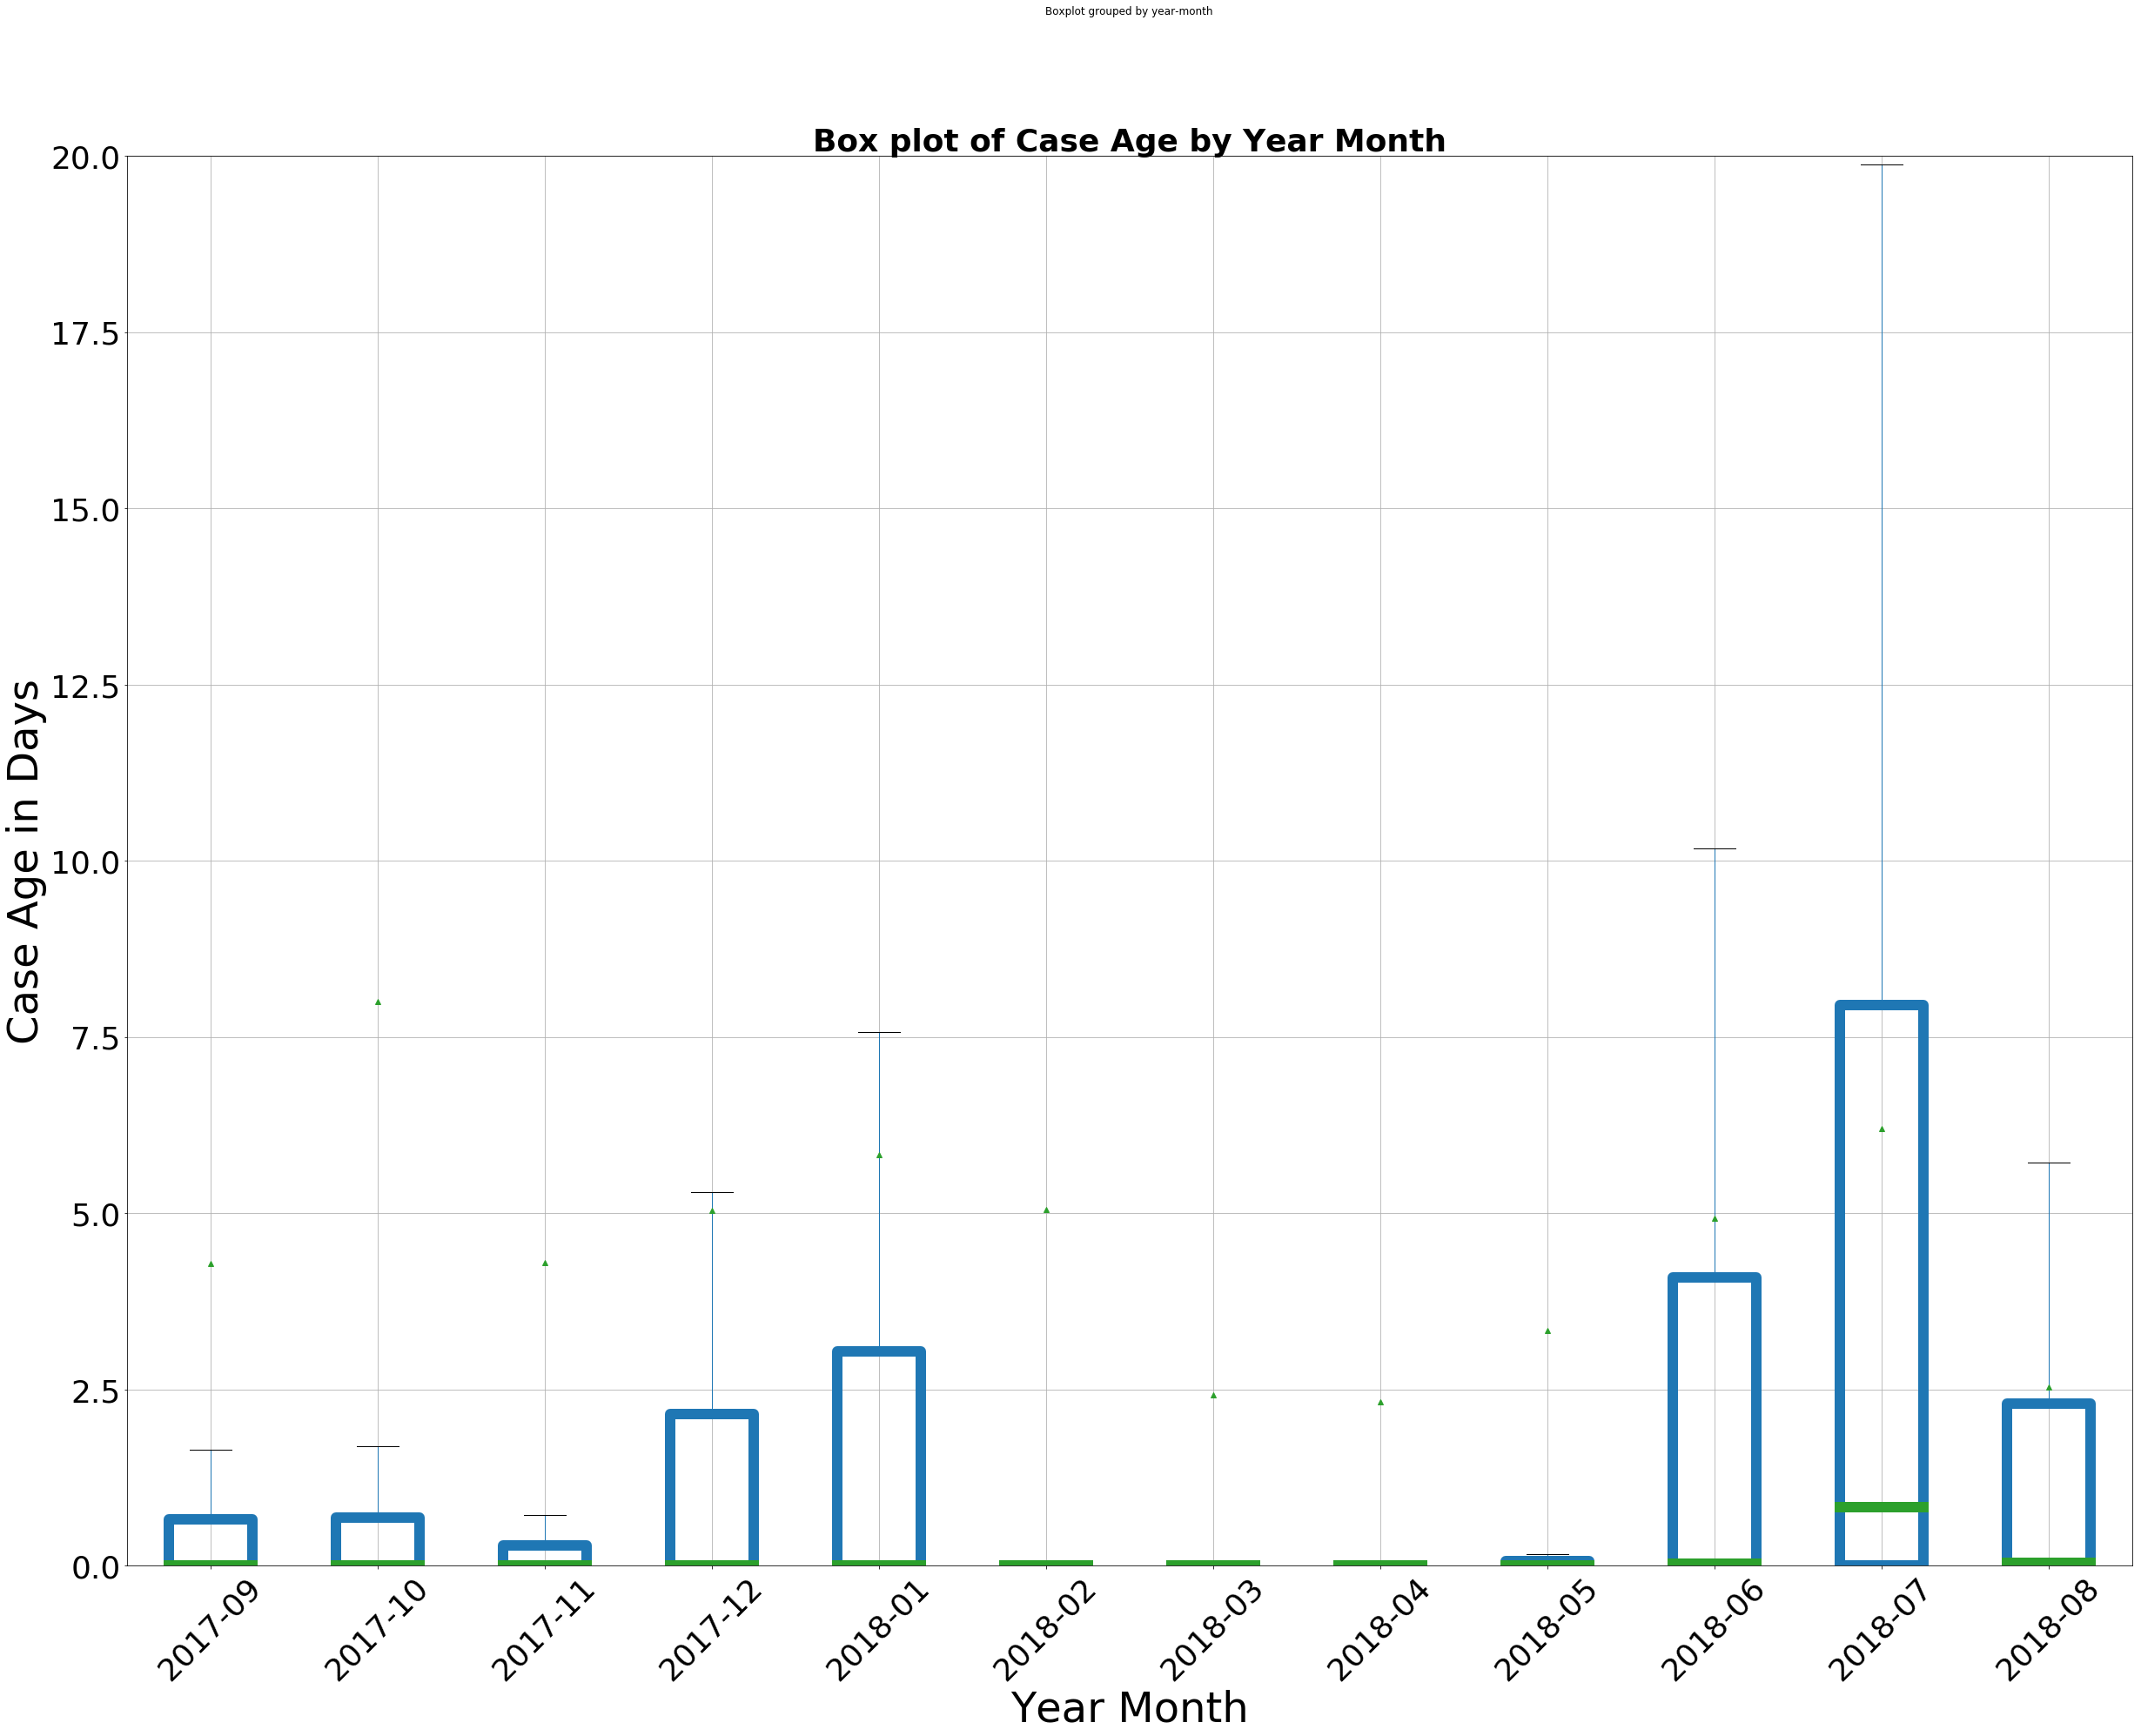

In [23]:
boxprops = dict(linestyle='-', linewidth=12, color='blue')
medianprops = dict(linestyle='-', linewidth=12, color='blue')
meanprops = dict(linestyle='-', linewidth=12, color='yellow')
bp = data.boxplot(column='CaseAge', by='year-month', rot=45, fontsize=15, figsize = (40,30),showfliers=False, showmeans=True,
                boxprops=boxprops,
                medianprops={'linestyle': '-', 'linewidth': 12, 'color':'green'})

bp.set_title("Box plot of Case Age by Year Month", fontsize=36, fontweight="bold")
bp.set_ylim((0,20))
bp.tick_params(axis='both',which='major',labelsize=36)
bp.tick_params(axis='both',which='minor',labelsize=36)
bp.set_xlabel("Year Month",fontsize=48)
bp.set_ylabel("Case Age in Days",fontsize=48)
plt.show()

In [77]:
sfdc_data_closed_oneyear_highage = sfdc_data_closed_oneyear[(sfdc_data_closed_oneyear['CaseAge'] >15)]
print(len(sfdc_data_closed_oneyear_highage))
print(sfdc_data_closed_oneyear_highage['Reason'].value_counts())
sfdc_data_closed_oneyear_highage_returns = sfdc_data_closed_oneyear_highage[sfdc_data_closed_oneyear_highage['Reason']=='Returns']
sfdc_data_closed_oneyear_highage_returns['GC_Secondary_Reason_Descr__c'].value_counts()
sfdc_data_closed_oneyear_highage_eos_returns = sfdc_data_closed_oneyear_highage_returns[sfdc_data_closed_oneyear_highage_returns['GC_Secondary_Reason_Descr__c']=='End of Season Return']

3712
Returns               2071
Credit                 858
Systems Support        558
Delivery/Shipments     222
Refusals                 3
Name: Reason, dtype: int64


In [79]:
sfdc_data_closed_oneyear_highage_eos_returns.to_csv("C:/Users/GCNDP/sfdc_high_age_returns.csv")

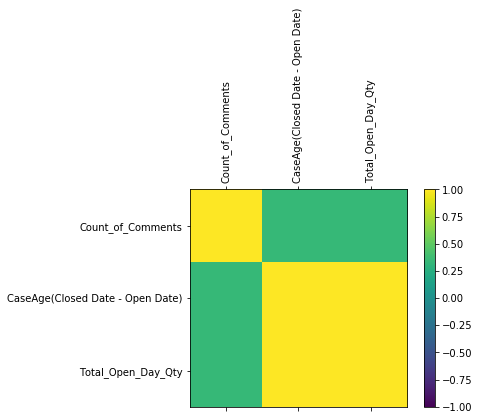

In [25]:
data = sfdc_data_closed_oneyear[['fCount_of_Comments_nbr__c','CaseAge','GC_Total_Open_Day_Qty_c__c']]
names = ['Count_of_Comments','CaseAge(Closed Date - Open Date)','Total_Open_Day_Qty']
correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,3,1)
ax.tick_params(axis='x', rotation=90)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [28]:
#do some data cleansing to make sure the correlation analysis runs without any error
m=sfdc_data_closed_oneyear["fCount_of_Comments_nbr__c"].isnull().any()
print(m[m])
m=sfdc_data_closed_oneyear["CaseAge"].isnull().any()
print(m[m])
sfdc_data_closed_oneyear = sfdc_data_closed_oneyear.dropna(subset = ['CaseAge'])
m=sfdc_data_closed_oneyear["CaseAge"].isnull().any()
print(m[m])
#sfdc_data_closed_oneyear["CaseAge"].fillna(ordinary["Engine HP"].mean())
#ordinary['Engine HP'] = ordinary['Engine HP'].apply(lambda x: x if not pd.isnull(x) else ordinary["Engine HP"].mean())
#m=ordinary["Engine HP"].isnull().any()
#print(m[m])


[]
[ True]
[]


In [29]:
from scipy.stats import pearsonr
corr, _ = pearsonr(sfdc_data_closed_oneyear['fCount_of_Comments_nbr__c'],sfdc_data_closed_oneyear['CaseAge'])
print('Pearsons correlation betweeen Count of Comments and Case Age (Closed Date - Open Date): %.3f' % corr)

Pearsons correlation betweeen Count of Comments and Case Age (Closed Date - Open Date): 0.340


In [33]:
print (sfdc_data_closed_JunAug['CaseAge'].head())

month
2018-08     3.863299
2018-08    10.821389
2018-08     5.693333
2018-08     3.815440
2018-08    10.811759
Freq: M, Name: CaseAge, dtype: float64


In [34]:
count_5plus = len(sfdc_data_closed_JunAug.loc[(sfdc_data_closed_JunAug['CaseAge']>=5) ])

count_2to5 = len(sfdc_data_closed_JunAug.loc[(sfdc_data_closed_JunAug['CaseAge']>2) & (sfdc_data_closed_JunAug['CaseAge']<5) ])

count_2 = len(sfdc_data_closed_JunAug.loc[(sfdc_data_closed_JunAug['CaseAge']>=0) & (sfdc_data_closed_JunAug['CaseAge']<=2) ])
print("Number of Cases with Age between 0 and 2 days:"+str(count_2))
print("Number of Cases with Age between 2 and 5 days:"+str(count_2to5))
print("Number of Cases with Age 5 days and beyond:"+str(count_5plus))

Number of Cases with Age between 0 and 2 days:15383
Number of Cases with Age between 2 and 5 days:1896
Number of Cases with Age 5 days and beyond:6107


# We find Number of cases with Age between 0 and 2 days : 15383, number of cases with Age between 2 and 5 days : 1896, Number of cases with Age 5 days and beyond : 6107

In [35]:
sfdc_case_JunAug2to5days = sfdc_data_closed_JunAug.loc[(sfdc_data_closed_JunAug['CaseAge']>2) & (sfdc_data_closed_JunAug['CaseAge']<5) ]
sfdc_case_JunAuggt5days = sfdc_data_closed_JunAug.loc[(sfdc_data_closed_JunAug['CaseAge']>=5)  ]

In [36]:
sfdc_data_closed_JunAug.groupby('AccountId').CreatedDate.apply(lambda x: x.diff().mean()).head()

AccountId
0013000001DL1R4AAL   NaT
0013000001DrPtQAAV   NaT
0013000001DrPzOAAV   NaT
0013000001DrQADAA3   NaT
0013000001DrQFGAA3   NaT
Name: CreatedDate, dtype: timedelta64[ns]

In [27]:
sfdc_data_closed_JunAug_orderDate=sfdc_data_closed_JunAug.sort_values(by='CreatedDate')

In [86]:
sfdc_data_closed_oneyear_orderDate=sfdc_data_closed_oneyear.sort_values(by='CreatedDate')

In [87]:
print(len(sfdc_data_closed_oneyear_orderDate))

45594


In [30]:
sfdc_data_closed_JunAug_orderDate['Reason'].head()

month
2018-06    Delivery/Shipments
2018-06    Delivery/Shipments
2018-06    Delivery/Shipments
2018-06    Delivery/Shipments
2018-06    Delivery/Shipments
Freq: M, Name: Reason, dtype: object

In [88]:
sfdc_data_closed_diff = sfdc_data_closed_oneyear_orderDate.groupby(['AccountId','Reason','GC_Secondary_Reason_Descr__c']).CreatedDate.apply(lambda x: x.diff().mean()/np.timedelta64(1, 'D')).sort_values(ascending=False).rename(columns={'AccountId':'AccountId','Reason' : 'Reason','GC_Secondary_Reason_Descr__c':'SecondaryReason','CreateDate':'DiffinDays'})

In [91]:
sfdc_data_closed_diff_acct = sfdc_data_closed_oneyear_orderDate.groupby(['AccountId']).CreatedDate.apply(lambda x: x.diff().mean()/np.timedelta64(1, 'D')).sort_values(ascending=False).rename(columns={'AccountId':'AccountId'})

In [89]:
sfdc_data_closed_diff=sfdc_data_closed_diff.fillna(0)
#Take all AccountIds who have raised Case within one days and above
sfdc_data_closed_diff=sfdc_data_closed_diff.loc[(sfdc_data_closed_diff>0)]
print(len(sfdc_data_closed_diff))
#print Account Ids with Avg Diff in days to raise Case in ascending order
sfdc_data_closed_diff_1day=sfdc_data_closed_diff.loc[(sfdc_data_closed_diff>0) & (sfdc_data_closed_diff<=1) ]

7922


In [92]:
sfdc_data_closed_diff_acct=sfdc_data_closed_diff_acct.fillna(0)
#Take all AccountIds who have raised Case within one days and above
sfdc_data_closed_diff_acct=sfdc_data_closed_diff_acct.loc[(sfdc_data_closed_diff_acct>0)]
print(len(sfdc_data_closed_diff_acct))
#print Account Ids with Avg Diff in days to raise Case in ascending order
sfdc_data_closed_diff_acct_1day=sfdc_data_closed_diff_acct.loc[(sfdc_data_closed_diff_acct >0) & (sfdc_data_closed_diff_acct <=1) ]

5040


In [90]:
print(sfdc_data_closed_diff_1day.sort_values(ascending=True)[:10])

AccountId           Reason    GC_Secondary_Reason_Descr__c  
0013000001HGBqMAAX  Refusals  Customer Commitment               0.000035
0013000001HG9PjAAL  Refusals  Storage/Equipment Restrictions    0.000035
0013000001HGBOfAAP  Refusals  Storage/Equipment Restrictions    0.000035
0013000001HGCeqAAH  Refusals  Storage/Equipment Restrictions    0.000041
0013000001HGBPVAA5  Refusals  Storage/Equipment Restrictions    0.000046
0013A00001QMQhnQAH  Refusals  Storage/Equipment Restrictions    0.000046
0013A00001QMtKOQA1  Refusals  Customer Commitment               0.000046
0013000001HG8CzAAL  Refusals  Dealer Unavailable                0.000046
0013000001HGCjEAAX  Refusals  Storage/Equipment Restrictions    0.000046
0013000001HG9MKAA1  Refusals  Storage/Equipment Restrictions    0.000050
dtype: float64


In [93]:
sfdc_data_closed_diff_acct_1day.head()

AccountId
0013000001G70BBAAZ    0.999294
0013000001G70TMAAZ    0.999144
0013000001Dri4IAAR    0.987465
0013000001G6zBfAAJ    0.982269
0013000001G705BAAR    0.979387
dtype: float64

In [69]:
#print(len(sfdc_data_closed_diff_1day))
sfdc_data_closed_diff_1day = sfdc_data_closed_diff_1day.reset_index()
sfdc_data_closed_diff_1day_refusals = sfdc_data_closed_diff_1day.loc[(sfdc_data_closed_diff_1day['Reason']=='Refusals')]

print(len(sfdc_data_closed_diff_1day_refusals))
AccList = sfdc_data_closed_diff_1day_refusals['AccountId']
#sfdc_data_closed_diff_1day_refusals.to_csv("C:/Users/GCNDP/oneday_refusals.csv")

1


In [95]:
sfdc_data_closed_diff_acct_1day = sfdc_data_closed_diff_acct_1day.reset_index()

In [96]:
AccList_1 = sfdc_data_closed_diff_acct_1day['AccountId']

In [97]:
print(len(AccList_1))

220


In [70]:
sfdc_data_closed_oneyear_ref_oneday = sfdc_data_closed_oneyear[sfdc_data_closed_oneyear.AccountId.isin(AccList)]

In [98]:
sfdc_data_closed_oneyear_ref_oneday_acct = sfdc_data_closed_oneyear[sfdc_data_closed_oneyear.AccountId.isin(AccList_1)]

In [71]:
sfdc_data_closed_oneyear_ref_oneday.to_csv("C:/Users/GCNDP/oneday_refusals.csv")

In [99]:
sfdc_data_closed_oneyear_ref_oneday_acct.to_csv("C:/Users/GCNDP/oneday_case_by_Acct.csv")

Text(0,0.5,'Count of AccountIds')

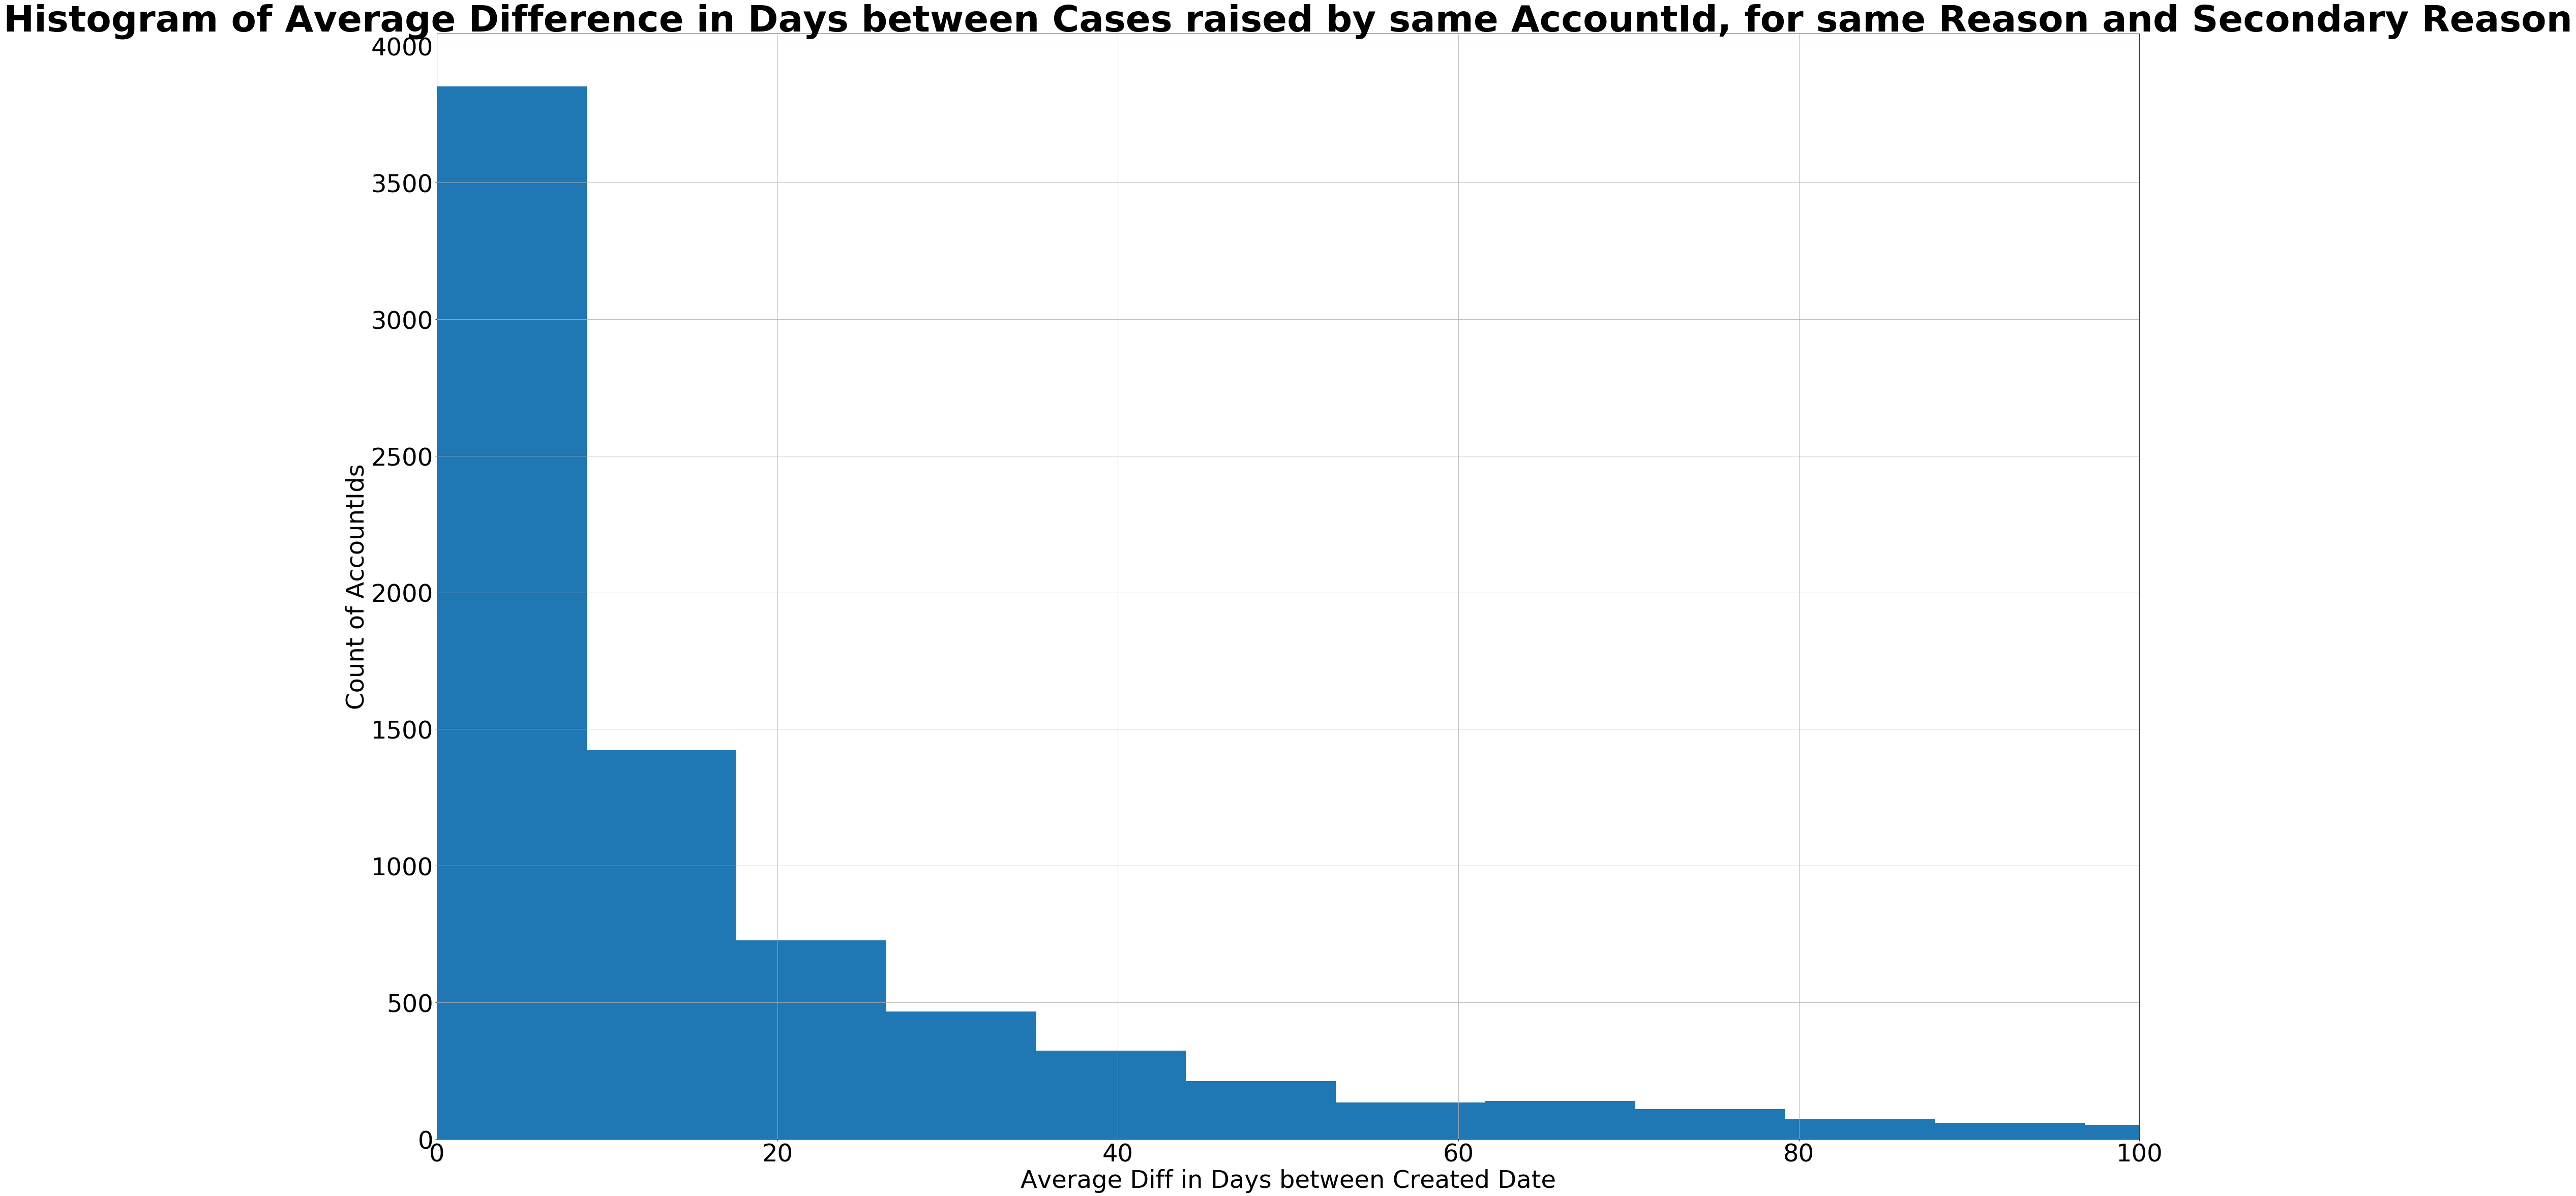

In [29]:
axarr = sfdc_data_closed_diff.hist(bins=40,figsize=(60,40),xlabelsize=36,ylabelsize=36)
axarr.set_title("Histogram of Average Difference in Days between Cases raised by same AccountId, for same Reason and Secondary Reason",fontsize=72,fontweight='bold')
axarr.set_xlabel("Average Diff in Days between Created Date",fontsize=48)
axarr.set_xlim((0,100))
axarr.tick_params(axis='both',which='major',labelsize=48)
axarr.tick_params(axis='both',which='minor',labelsize=48)
axarr.set_ylabel("Count of AccountIds",fontsize=48)


In [34]:
sfdc_data_closed_diff = sfdc_data_closed_diff.reset_index()
#sfdc_data_closed_diff.rename(columns={0:'AcctId',3:'CountDays'}, inplace=True)

In [37]:
sfdc_data_closed_diff[:5]
AccountIDlist = sfdc_data_closed_diff['AccountId']
#print(sfdc_data_closed_diff.sort_values(by='Countofdays',ascending=True)[:5])
print(AccountIDlist[:5])

0    0013000001G6z9UAAR
1    0013000001G6zCgAAJ
2    0013000001KNZFoAAP
3    0013000001G6zCgAAJ
4    0013000001G71ZzAAJ
Name: AccountId, dtype: object


In [139]:
sfdc_data_closed_diff_byAcct = sfdc_data_closed_diff.groupby(['AccountId']).size()

In [36]:
sfdc_data_closed_diff_byAcct_1day = sfdc_data_closed_diff_1day.groupby(['AccountId']).size()

In [142]:
print(sfdc_data_closed_diff_byAcct.sort_values(ascending=False)[:5])

AccountId
0013000001HzEwBAAV    35
0013000001N6HIhAAN    14
0013000001IM0mPAAT    13
0013000001IJwd4AAD    13
0013000001IJibXAAT    13
dtype: int64


In [37]:
print(sfdc_data_closed_diff_byAcct_1day.sort_values(ascending=False)[:5])

AccountId
0013000001IJi3NAAT    4
0013A00001REdXHQA1    4
0013000001IJmBFAA1    4
0013000001IJlzWAAT    4
0013000001N6VZrAAN    4
dtype: int64


In [143]:
AcctIDList = ['0013000001HzEwBAAV', '0013000001N6HIhAAN','0013000001IJwd4AAD','0013000001IM0mPAAT','0013000001IJlaUAAT']

In [144]:
sfdc_data_closed_diff_byAcct = sfdc_data_closed_diff_byAcct.reset_index()
#sfdc_data_closed_diff_byAcct.rename(columns={0:'AccountId',1:'Count'}, inplace=True)

In [145]:
sfdc_data_closed_diff_top5 = sfdc_data_closed_diff[sfdc_data_closed_diff.AccountId.isin(AcctIDList)]

In [41]:
sfdc_data_closed_oneyear_orderDate_acct = sfdc_data_closed_oneyear_orderDate.loc[(sfdc_data_closed_oneyear_orderDate.AccountId=='0013000001IJi3NAAT') & (sfdc_data_closed_oneyear_orderDate.CreatedDate.apply(lambda x: x.diff().mean()/np.timedelta64(1, 'D')) > 0) & (sfdc_data_closed_oneyear_orderDate.CreatedDate.apply(lambda x: x.diff().mean()/np.timedelta64(1, 'D')) < 1)]

AttributeError: 'Timestamp' object has no attribute 'diff'

In [40]:
print(sfdc_data_closed_oneyear_orderDate_acct['CaseNumber'])

month
2018-02    1122489
2018-02    1122509
2018-02    1123138
2018-02    1138970
2018-02    1139264
2018-02    1139272
2018-02    1139385
2018-02    1139400
2018-02    1139408
2018-02    1139554
2018-02    1139568
2018-05    1267916
2018-06    1309153
2018-06    1309252
2018-06    1309253
2018-06    1312028
2018-06    1312166
2018-06    1312171
2018-06    1312174
2018-07    1315688
2018-07    1321603
2018-07    1324377
2018-07    1325463
2018-07    1325717
2018-07    1326051
2018-07    1326052
2018-07    1332117
2018-07    1332566
2018-07    1332569
2018-07    1332665
2018-07    1333003
2018-08    1340002
2018-08    1340022
2018-08    1340033
2018-08    1340054
2018-08    1340192
2018-08    1340218
2018-08    1340230
2018-08    1342226
Freq: M, Name: CaseNumber, dtype: int64


In [31]:
#print(sfdc_data_closed_diff['CreatedDate'].max().round(2))
print('Median diff in Created date between two cases for Same Acct ID, Reason and Secondary Reason:'+str(round(sfdc_data_closed_diff.median(),2)))
print('Minimum diff in Created date between two cases for Same Acct ID, Reason and Secondary Reason:'+str(sfdc_data_closed_diff.min().round(6)))

Median diff in Created date between two cases for Same Acct ID, Reason and Secondary Reason:9.28
Minimum diff in Created date between two cases for Same Acct ID, Reason and Secondary Reason:3.5e-05


In [32]:

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
count_20plus = len(sfdc_data_closed_diff.loc[(sfdc_data_closed_diff>=20) ])

count_10to20 = len(sfdc_data_closed_diff.loc[(sfdc_data_closed_diff>10) & (sfdc_data_closed_diff<20) ])
count_5_10 = len(sfdc_data_closed_diff.loc[(sfdc_data_closed_diff>5) & (sfdc_data_closed_diff<=10) ])
count_5 = len(sfdc_data_closed_diff.loc[(sfdc_data_closed_diff>=1) & (sfdc_data_closed_diff<=5) ])

print(color.BOLD+"Count of Accounts with Average Diff between cases between 1 and 5 days, for same Reason Code and Secondary Reason Code:"+str(count_5))
print(color.BOLD+"Count of Accounts with Average Diff between cases between 5 and 10 days, for same Reason Code and Secondary Reason Code:"+str(count_5_10))
print("Count of Accounts with Average Diff between cases between 10 and 20 days, for same Reason Code and Secondary Reason Code:"+str(count_10to20))
print("Count of Accounts with Average Diff between cases > 20 days, for same Reason Code and Secondary Reason Code:"+str(count_20plus))

count_20plus = round(count_20plus*100/len(sfdc_data_closed_diff),2)
count_10to20 = round(count_10to20*100/len(sfdc_data_closed_diff),2)
count_5_10 = round(count_5_10*100/len(sfdc_data_closed_diff),2)
count_5 = round(count_5*100/len(sfdc_data_closed_diff),2)
#count_2 = len(sfdc_data_closed_Jun.loc[(sfdc_data_closed_Jun['Age_in_Business_Days']>=0) & (sfdc_data_closed_Jun['Age_in_Business_Days']<=2) ])

print(color.BOLD+"Percentage of Accounts with Average Diff between cases between 1 and 5 days, for same Reason Code and Secondary Reason Code:"+str(count_5))
print(color.BOLD+"Percentage of Accounts with Average Diff between cases between 5 and 10 days, for same Reason Code and Secondary Reason Code:"+str(count_5_10))
print("Percentage of Accounts with Average Diff between cases between 10 and 20 days, for same Reason Code and Secondary Reason Code:"+str(count_10to20))
print("Percentage of Accounts with Average Diff between cases > 20 days, for same Reason Code and Secondary Reason Code:"+str(count_20plus))

Count of Accounts with Average Diff between cases between 1 and 5 days, for same Reason Code and Secondary Reason Code:1686
Count of Accounts with Average Diff between cases between 5 and 10 days, for same Reason Code and Secondary Reason Code:1386
Count of Accounts with Average Diff between cases between 10 and 20 days, for same Reason Code and Secondary Reason Code:1380
Count of Accounts with Average Diff between cases > 20 days, for same Reason Code and Secondary Reason Code:2410
Percentage of Accounts with Average Diff between cases between 1 and 5 days, for same Reason Code and Secondary Reason Code:21.28
Percentage of Accounts with Average Diff between cases between 5 and 10 days, for same Reason Code and Secondary Reason Code:17.5
Percentage of Accounts with Average Diff between cases between 10 and 20 days, for same Reason Code and Secondary Reason Code:17.42
Percentage of Accounts with Average Diff between cases > 20 days, for same Reason Code and Secondary Reason Code:30.42


In [ ]:
axarr = sfdc_data_closed_diff.hist(by='CreatedDate',bins=40,figsize=(60,40),xlabelsize=36,ylabelsize=36)
axarr[0][0].set_title("Histogram of Average Difference in Days between Cases raised by same AccountId, for same Reason and Secondary Reason",fontsize=72,fontweight='bold')
axarr[0][0].set_xlabel("Average Diff in Days between Created Date",fontsize=48)
axarr[0][0].set_xlim((0,100))
axarr[0][0].tick_params(axis='both',which='major',labelsize=48)
axarr[0][0].tick_params(axis='both',which='minor',labelsize=48)
axarr[0][0].set_ylabel("Count of AccountIds",fontsize=48)

In [91]:
Account_ct_sameReason = sfdc_data_closed_oneyear_orderDate.groupby(['AccountId','Reason']).size()

In [92]:
Account_ct_sameSecReason = sfdc_data_closed_oneyear_orderDate.groupby(['AccountId','Reason','GC_Secondary_Reason_Descr__c']).size() 

In [93]:
print(Account_ct_sameReason.sort_values(ascending=False)[:10])

AccountId           Reason            
0013000001HzEwBAAV  Delivery/Shipments    1499
                    Systems Support        910
                    Credit                 293
0013000001HG8oYAAT  Delivery/Shipments     111
0013000001HzEwBAAV  Returns                 99
0013000001G71C6AAJ  Credit                  73
0013000001G83uOAAR  Delivery/Shipments      66
0013000001G71kwAAB  Credit                  60
0013000001IJknJAAT  Refusals                49
0013000001G6zSwAAJ  Systems Support         48
dtype: int64


In [94]:
print(Account_ct_sameSecReason.sort_values(ascending=False)[:10])

AccountId           Reason              GC_Secondary_Reason_Descr__c
0013000001HzEwBAAV  Delivery/Shipments  Other                           730
                                        Delivery Status                 597
                    Systems Support     Computer Support/ Setup         329
                                        Seedsman Tools                  207
                                        Other                           119
                    Credit              Credit Account Inquiry           98
0013000001HG8oYAAT  Delivery/Shipments  Delivery Status                  92
0013000001HzEwBAAV  Delivery/Shipments  Cancel Delivery                  87
                    Systems Support     Compass                          84
                    Credit              Other                            80
dtype: int64


In [95]:
Ct_sameSecReason = sfdc_data_closed_oneyear_orderDate.groupby(['Reason','GC_Secondary_Reason_Descr__c','AccountId']).size() 

In [96]:
print(Ct_sameSecReason.sort_values(ascending=False)[:10])

Reason              GC_Secondary_Reason_Descr__c  AccountId         
Delivery/Shipments  Other                         0013000001HzEwBAAV    730
                    Delivery Status               0013000001HzEwBAAV    597
Systems Support     Computer Support/ Setup       0013000001HzEwBAAV    329
                    Seedsman Tools                0013000001HzEwBAAV    207
                    Other                         0013000001HzEwBAAV    119
Credit              Credit Account Inquiry        0013000001HzEwBAAV     98
Delivery/Shipments  Delivery Status               0013000001HG8oYAAT     92
                    Cancel Delivery               0013000001HzEwBAAV     87
Systems Support     Compass                       0013000001HzEwBAAV     84
Credit              Other                         0013000001HzEwBAAV     80
dtype: int64


Text(0,0.5,'Count of AccountIds')

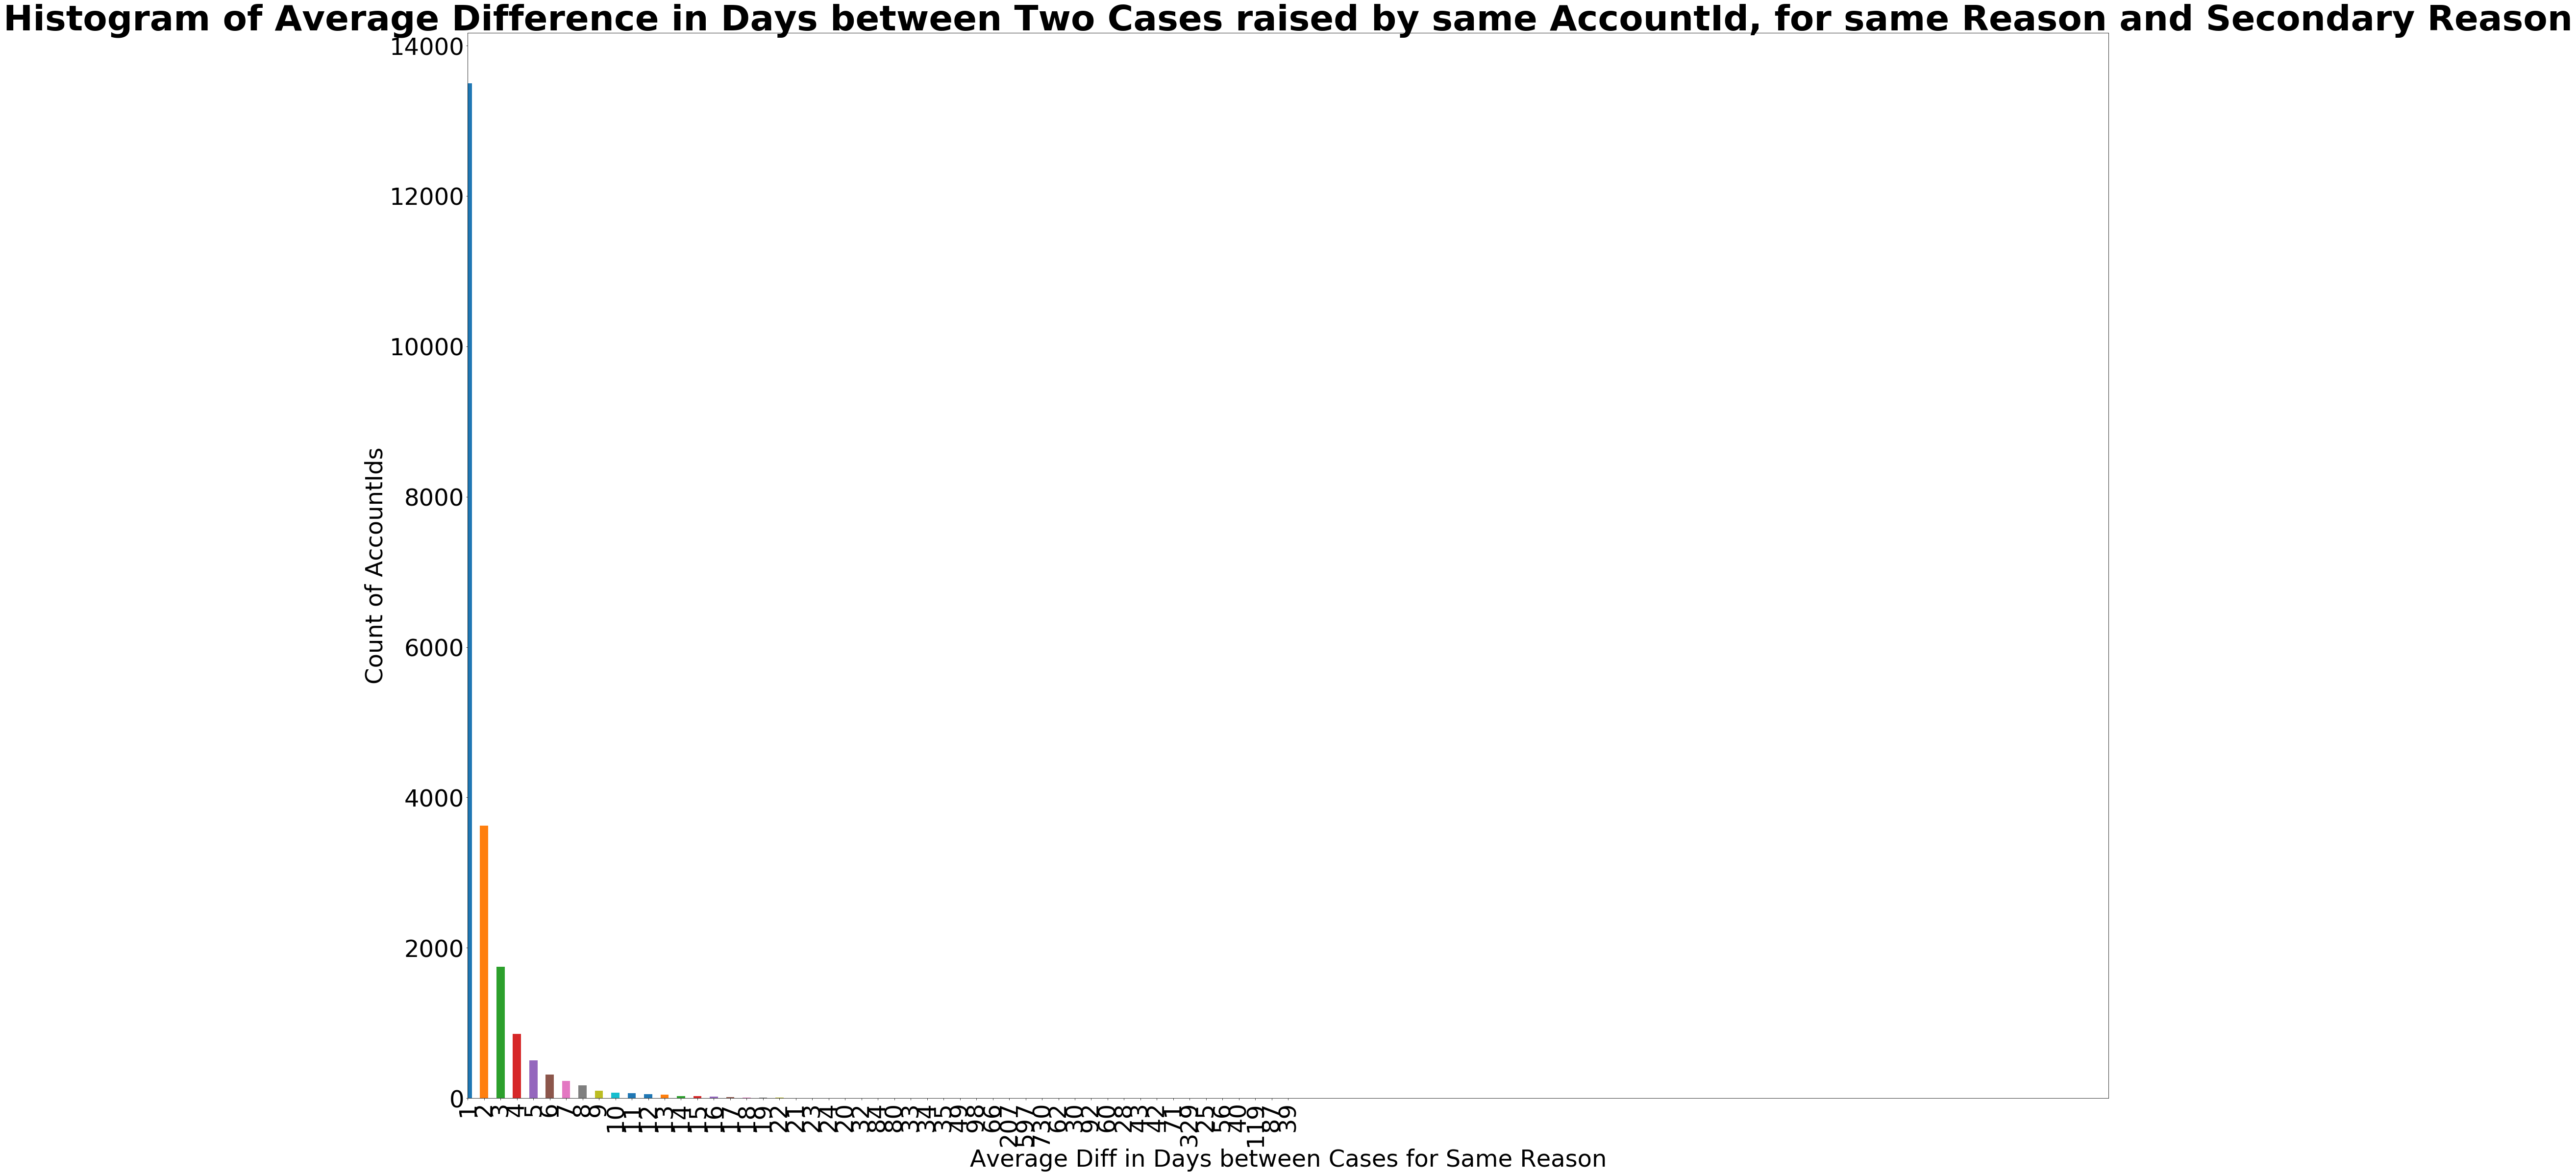

In [99]:
axarr = Ct_sameSecReason.sort_values(ascending=False).value_counts().plot(kind='bar',figsize=(60,40))
#Account_ct_sameSecReason.sort_values().value_counts().plot(kind='bar',figsize=(60,40))
axarr.set_title("Histogram of Average Difference in Days between Two Cases raised by same AccountId, for same Reason and Secondary Reason",fontsize=72,fontweight='bold')
axarr.set_xlabel("Average Diff in Days between Cases for Same Reason",fontsize=48)
axarr.set_xlim((0,100))
axarr.tick_params(axis='both',which='major',labelsize=48)
axarr.tick_params(axis='both',which='minor',labelsize=48)
axarr.set_ylabel("Count of AccountIds",fontsize=48)

# We find most Cases raised for Same Reason multiple times by same Account ID, ex: 0013000001HG8oYAAT  Delivery/Shipments  Delivery Status  - 86 cases raised

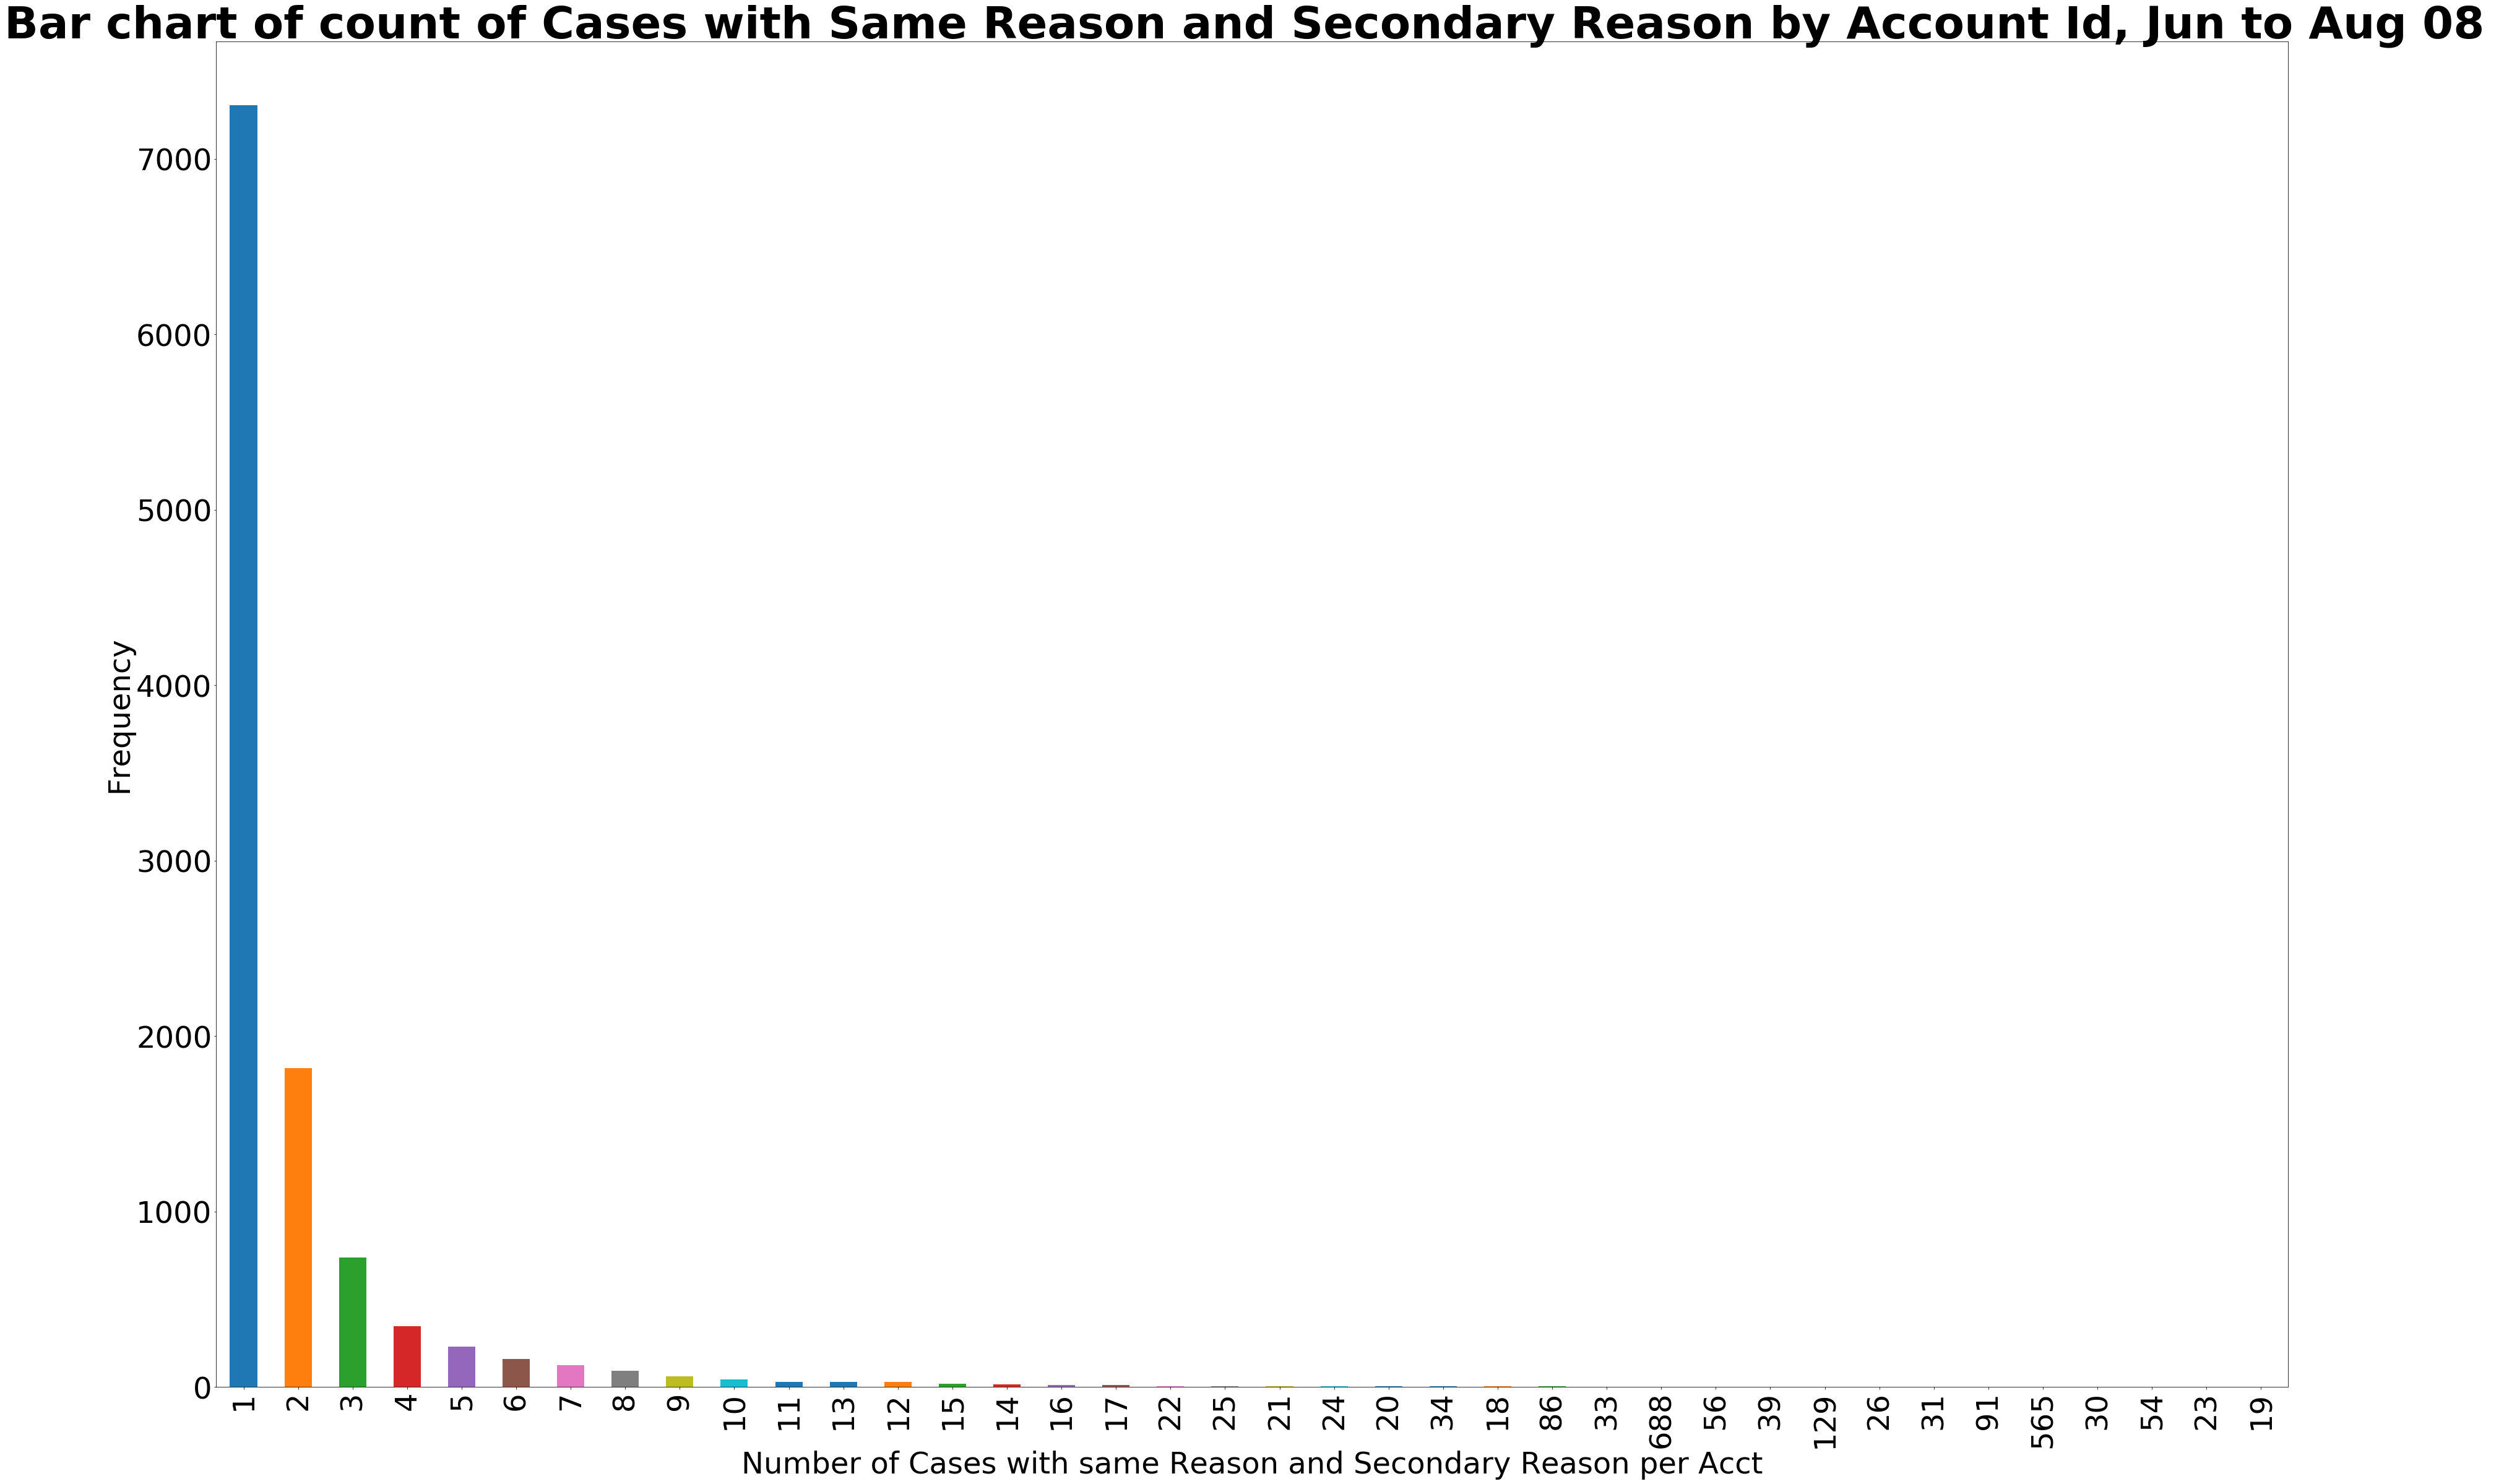

In [59]:
axarr = Account_ct_sameSecReason.sort_values().value_counts().plot(kind='bar',figsize=(60,40))
axarr.set_title("Bar chart of count of Cases with Same Reason and Secondary Reason by Account Id, Jun to Aug 08 ",fontsize=72,fontweight='bold')
axarr.set_xlabel("Number of Cases with same Reason and Secondary Reason per Acct",fontsize=48)
#axarr[0][0].set_xlim((0,100))
axarr.set_ylabel("Frequency",fontsize=48)
axarr.tick_params(axis='both',which='major',labelsize=48)
axarr.tick_params(axis='both',which='minor',labelsize=48)


In [44]:
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer


def plot_frequency_distribution_of_ngrams(sample_texts,
                                          ngram_range=(1, 2),
                                          num_ngrams=50):
    """Plots the frequency distribution of n-grams.

    # Arguments
        samples_texts: list, sample texts.
        ngram_range: tuple (min, mplt), The range of n-gram values to consider.
            Min and mplt are the lower and upper bound values for the range.
        num_ngrams: int, number of n-grams to plot.
            Top `num_ngrams` frequent n-grams will be plotted.
    """
    # Create args required for vectorizing.
    kwargs = {
            'ngram_range': (1, 2),
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word',  # Split text into word tokens.
    }
    vectorizer = CountVectorizer(**kwargs)

    # This creates a vocabulary (dict, where keys are n-grams and values are
    # idxices). This also converts every text to an array the length of
    # vocabulary, where every element idxicates the count of the n-gram
    # corresponding at that idxex in vocabulary.
    vectorized_texts = vectorizer.fit_transform(sample_texts)

    # This is the list of all n-grams in the index order from the vocabulary.
    all_ngrams = list(vectorizer.get_feature_names())
    num_ngrams = min(num_ngrams, len(all_ngrams))
    # ngrams = all_ngrams[:num_ngrams]

    # Add up the counts per n-gram ie. column-wise
    all_counts = vectorized_texts.sum(axis=0).tolist()[0]

    # Sort n-grams and counts by frequency and get top `num_ngrams` ngrams.
    all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
        zip(all_counts, all_ngrams), reverse=True)])
    ngrams = list(all_ngrams)[:num_ngrams]
    counts = list(all_counts)[:num_ngrams]

    idx = np.arange(num_ngrams)
    

    plt.figure(figsize=(40, 20))  # width:20, height:3
    plt.bar(idx, counts, width=0.8, color='b')
    plt.xlabel('bi-grams',fontsize='72',fontweight='bold')
    plt.ylabel('Frequencies',fontsize='72',fontweight='bold')
    #plt.axis([0,20,0,160])
    plt.title('Frequency distribution of bi-grams',fontsize='72',fontweight='bold')
    plt.xticks(idx, ngrams, rotation=90, fontsize=24)
    #plt.yticks(idx, ngrams,fontsize=36)
    plt.show()


def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()


def plot_class_distribution(labels):
    """Plots the class distribution.

    # Arguments
        labels: list, label values.
            There should be at lease one sample for values in the
            range (0, num_classes -1)
    """
    num_classes = get_num_classes(labels)
    count_map = Counter(labels)
    counts = [count_map[i] for i in range(num_classes)]
    idx = np.arange(num_classes)
    plt.bar(idx, counts, width=0.8, color='b')
    plt.xlabel('Class')
    plt.ylabel('Number of samples')
    plt.title('Class distribution')
    plt.xticks(idx, idx)
    plt.show()

In [50]:
AccountId_sameReason = sfdc_data_closed_oneyear[sfdc_data_closed_oneyear.AccountId.isin(AccountIDlist)]
corpus = AccountId_sameReason['Description'].astype(str)  
AccountId_sameReason.to_csv("C:/Users/GCNDP/SameReasonAcct.csv")

In [45]:
import re
import nltk
import string
exclude = set(string.punctuation) 
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')
newStopWords = ['lb','j','df','jdf','returns','please','return','email','sent','said','may','monsanto','know','thank','let','use','get','ready','see','st','us','hours','well',
                'called','hour','https','monsantocom','mailto']
stop_words.extend(newStopWords)
table = str.maketrans('', '', string.punctuation)
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
   # doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I)
   # doc = doc.lower()
   # doc = doc.strip()
    # tokenize document
    tokens = doc.split()
    # remove punctuation from each word
    tokens = [w.translate(table) for w in tokens]
    #wpt.tokenize(doc)
    # convert to lower case
    lower_tokens = [w.lower() for w in tokens]
    #remove spaces
    stripped = [w.strip() for w in lower_tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter stopwords out of document
    filtered_tokens = [token for token in words if token not in stop_words]
    #apply Stemming
    #stemmed = [porter.stem(word) for word in filtered_tokens]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

In [46]:
norm_corpus = normalize_corpus(corpus)

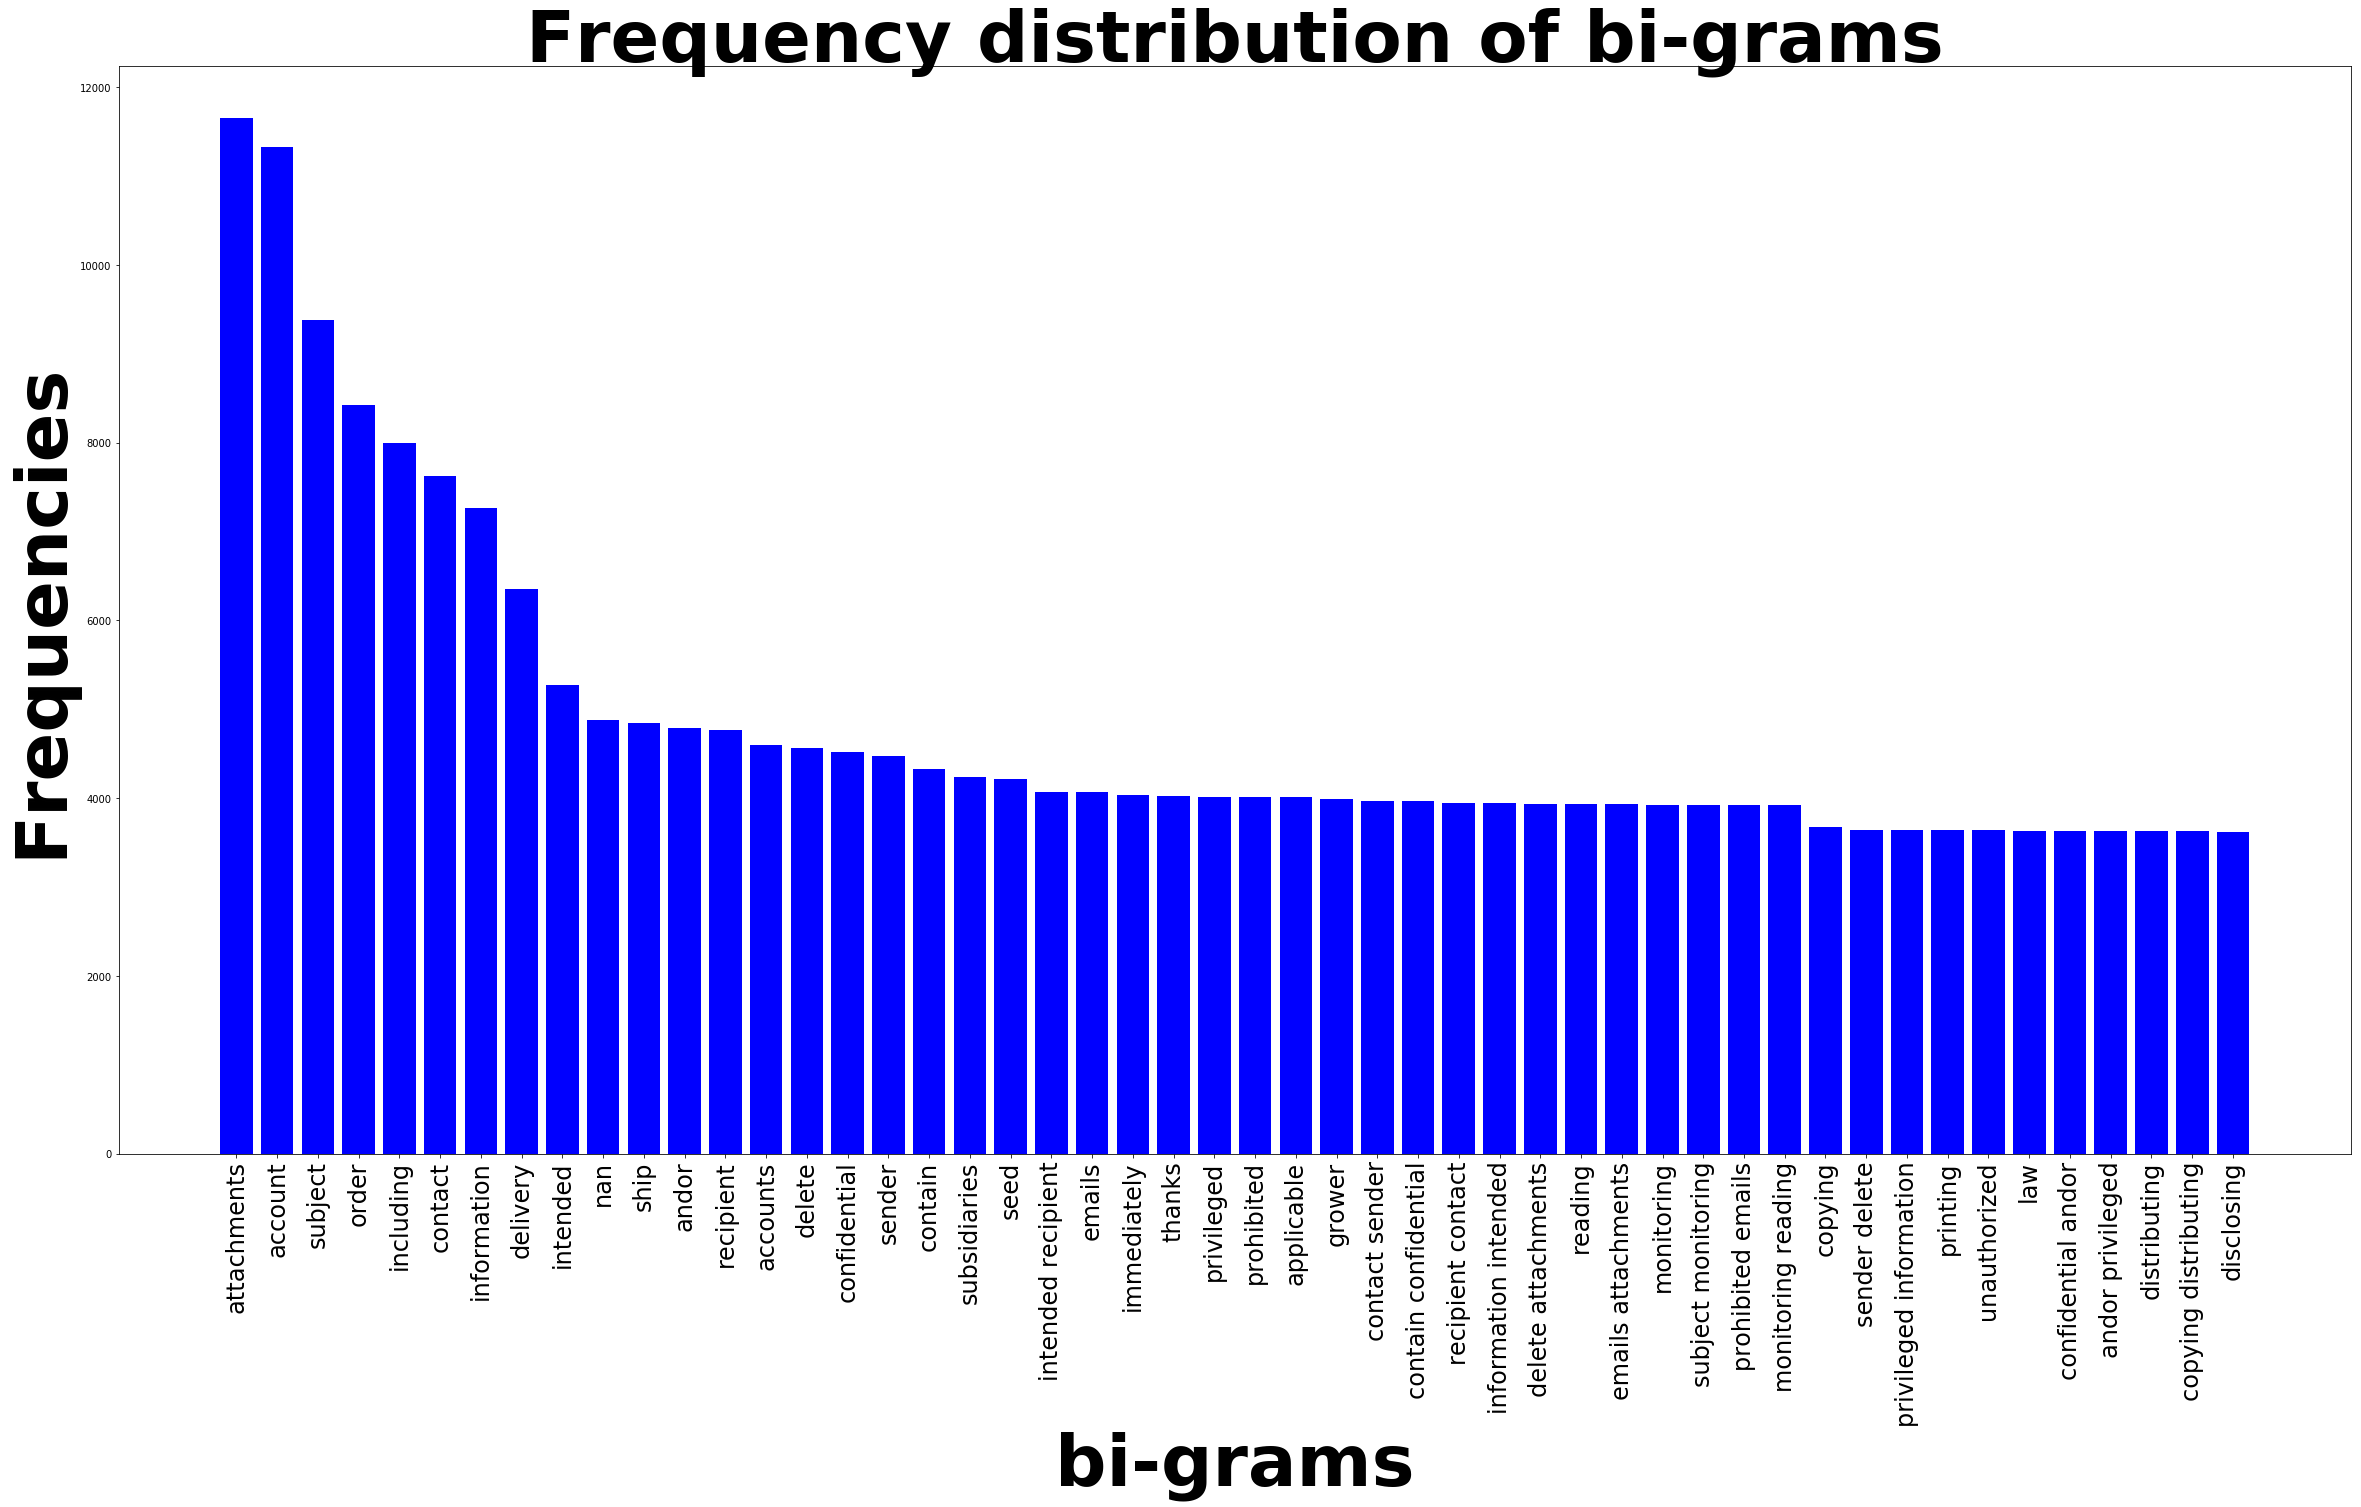

In [47]:
plot_frequency_distribution_of_ngrams(norm_corpus)

In [48]:
from wordcloud import WordCloud, STOPWORDS

from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
stop_words = nltk.corpus.stopwords.words('english')
newStopWords = ['lb','j','df','jdf','returns','please','return','email','sent','said','may','monsanto','know','thank','let','use','get','ready','see','st','us','hours','well',
                'called','hour','https','monsantocom','mailto','recipient','intended']
stop_words.extend(newStopWords)
wpt = nltk.WordPunctTokenizer()

def normalize_text(text):
    tokens = word_tokenize(text)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #print(words[:100])
    doc = ' '.join(words)
    return doc

def generate_wordcloud(text):
    wordcloud = WordCloud().generate(normalize_text(text))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    return wordcloud

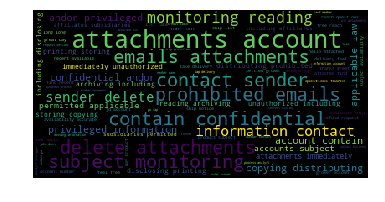

In [49]:
Desc_txt=corpus
wordcloud = generate_wordcloud(' '.join(Desc_txt))

In [67]:
sfdc_case_JunAug2to5days_Returns=sfdc_case_JunAug2to5days.loc[( sfdc_case_JunAug2to5days['Reason']=='Returns')]

In [68]:
print(len(sfdc_case_JunAug2to5days_Returns))

829


In [69]:
corpus = sfdc_case_JunAug2to5days_Returns['Description'].astype(str)  

# Word Cloud for Returns in Jun - Aug 08 with Case Age between 2 and 5 days

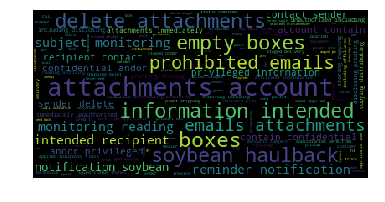

In [70]:
Desc_txt=corpus
wordcloud = generate_wordcloud(' '.join(Desc_txt))

In [72]:
sfdc_case_JunAuggt5days_Returns=sfdc_case_JunAuggt5days.loc[(sfdc_case_JunAuggt5days['Reason']=='Returns')]

In [206]:
sfdc_data_closed_Returns = sfdc_data_closed_oneyear.loc[(sfdc_data_closed_oneyear['Reason']=='Returns')]
corpus = sfdc_data_closed_Returns['Description'].astype(str)  

# Word Cloud for Returns in Jun - Aug 08 with Case Age > 5 days

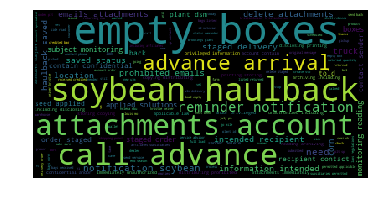

In [207]:
Desc_txt=corpus
wordcloud = generate_wordcloud(' '.join(Desc_txt))

In [208]:
sfdc_data_closed_Returns = sfdc_data_closed_oneyear.loc[(sfdc_data_closed_oneyear['Reason']=='Delivery/Shipments')]
corpus = sfdc_data_closed_Returns['Description'].astype(str)  

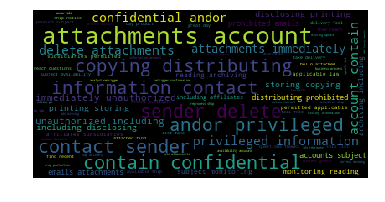

In [211]:
Desc_txt=corpus
wordcloud = generate_wordcloud(' '.join(Desc_txt))